# Algorihtme de bonne numérotation d'un graphe orienté

On dit qu'un graphe orienté est bien numéroté si pour tout arc `(x, y)` , (arc : x -> y ) le numéro de `x` est supérieur au numéro de `y`
<div style="display: flex;">
    <div>
        <h4> Bonne numérotation : </h4>
        <img src="images/good_numbering_ex.png">
    </div>
    <div>
        <h4> Mauvaise numérotation : </h4>
        <img src="images/bad_numbering_ex.png">
    </div>
</div>


## Propriétés :
Pour qu'un graphe possède une bonne numérotation il est nécessaire et suffisant que ce graphe n'ai **pas de circuits**. Un **circuit** est un chemin d'arcs qui ont le même sommet de départ et d'arrivée.



In [9]:
#imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


## Graphe sans circuit :

**Propriété**:
Soit un graphe *G*, si pour tout sous graphe *g* de *G* il existe au moins un sommet sans prédecesseur $\Leftrightarrow$ *G* est sans circuit (*acyclic* en anglais)

**Preuve**:
...

Algorithme :


> La fonction `create_acyclic_DiGraph` est disponible dans le fichier [graph_creator.py](./graph_creator.py "Lien vers le fichier")

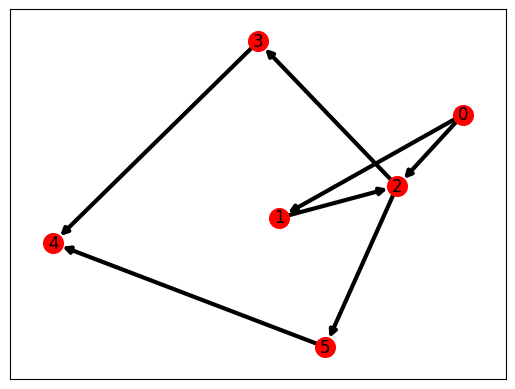

In [10]:

from graph_creator import create_acyclic_DiGraph, draw_graph, draw_grey_graph
graph = create_acyclic_DiGraph(6, 8)
draw_graph(graph)

## L'algorithme de bonne numérotation

Blabla sur l'algorithme

L'algorithme de bonne numérotation va :
- Numéroter un sommet sans prédecesseurs (depuis la *stack*)
- Enlever le sommet numéroté du graph | Traiter le sous graphe ne contenant plus le sommet numéroté
- Ajouter dans la stack les sommets du sous graphe sans prédecesseurs
- Recommencer

`num_predecessors` est un *dictionary* qui associe à chaque sommet son nombre de predecesseurs.  
`vertex_without_predecessor` est une *stack* (pile en français) qui contient les sommets sans prédecesseurs qui peuvent donc être numérotés.  
`good_numbered_vertices` est un dictionnaire associant **l'ancienne mauvaise numérotation** à la **nouvelle bonne numérotation**. Pour la bonne numérotation du graphe on numérotera les sommets avec des lettres dans l'ordre *A, B, C, D, E...*


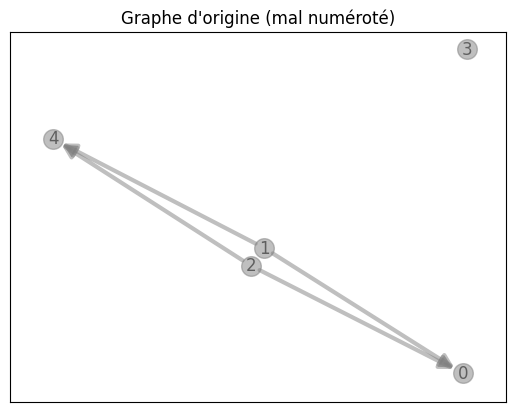

None

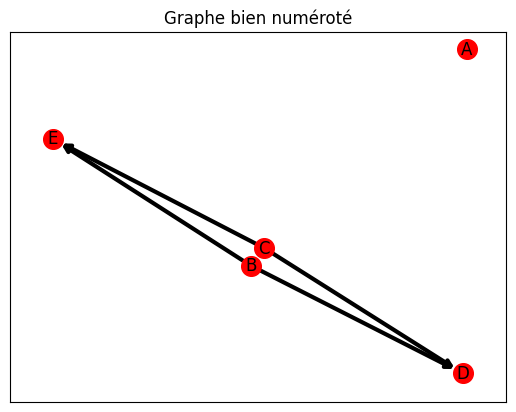

None

In [12]:
def good_numbering(graph: nx.DiGraph, alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    num_vertices = graph.number_of_nodes()
    num_predecessors: dict = {vertex :len(list(graph.predecessors(vertex))) for vertex in range(num_vertices)} #ex {0: 1, vertex: num_predecessor,...}  vertex 0 has 2 predecessors
    vertices_without_predecessor = [vertex for vertex in range(num_vertices) if num_predecessors[vertex]==0] # stack

    good_numbered_vertices = {} # ex {0:'C', 1:'A', old: new,...}
    number = 0
    while len(vertices_without_predecessor)>0:
        vertex = vertices_without_predecessor.pop()
        good_numbered_vertices[vertex]= alphabet[number]
        number += 1
        for successor in graph.successors(vertex):
            num_predecessors[successor] -= 1  # "Delete vertex" from the graph to number
            if num_predecessors[successor] == 0:
                vertices_without_predecessor.append(successor)
    return good_numbered_vertices


def create_numbered_graph(graph : nx.DiGraph, good_numbered_vertices: dict):
    numbered_graph = graph.copy()
    numbered_graph = nx.relabel_nodes(numbered_graph, good_numbered_vertices)
    return numbered_graph

graph = create_acyclic_DiGraph(5, 5)
draw_grey_graph(graph, title="Graphe d'origine (mal numéroté)")
display(plt.show())

good_numbered_vertices = good_numbering(graph)
numbered_graph = create_numbered_graph(graph, good_numbered_vertices)
draw_graph(numbered_graph, title="Graphe bien numéroté")
display(plt.show())

### Complexité :

Pour l'initialisation des tableaux suivant la compléxité est en $O(n)$, n le nombre de sommets car on a `range(num_vertices)` :
```python
num_predecessors: dict = {vertex :len(list(graph.predecessors(vertex))) for vertex in range(num_vertices)}
vertices_without_predecessor = [vertex for vertex in range(num_vertices) if num_predecessors[vertex]==0]
```

Pour la boucle `while`, la complexité est aussi $O(n)$. La stack se remplit et au final on examine tous les sommets du graphe, car il faut tous les numéroter :
```python
while len(vertex_without_predecessor)>0:
```

A l'intérieur de la boucle `while`, il y a une boucle `for` qui itère sur tous les successeurs d'un sommet donc complexité $d^{+}(i)$, le nombre de successeurs d'un sommet. Comme dans la boucle `while` on itère sur tous les sommets on aura la complexité global pour $\sum_{i=1}^{n} d^{+}(i) = m$, m le nombre d'arcs :
```python
        for successor in graph.successors(vertex):
```

D'où la complexité de l'algorithme pour $O(m)$, m le nombre d'arcs.

